In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import median, maximum, minimum, gradient, autolevel, otsu
#from skimage.filters import threshold_otsu

In [2]:
def custom_plot(im):
    hist = np.histogram(im, bins=np.arange(0, 256))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    ax1.imshow(im, interpolation='none', cmap=plt.cm.gray)
    ax1.axis('off')
    ax2.set_yscale('log')
    ax2.plot(hist[1][:-1], hist[0], lw=2)
    ax2.set_title('Histogram of grey values')

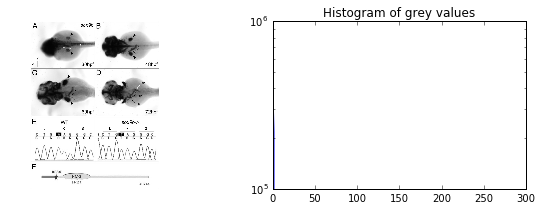

In [30]:
im = data.imread('Comp4.jpg',as_grey=True)
custom_plot(im)

/Users/mviana/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


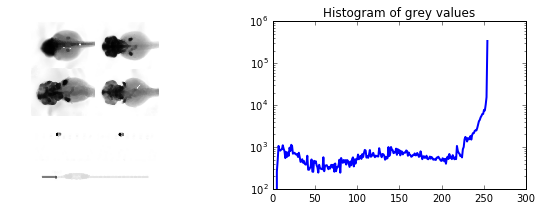

In [22]:
im_open = minimum(maximum(im, disk(5)), disk(5))
custom_plot(im_open)

/Users/mviana/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


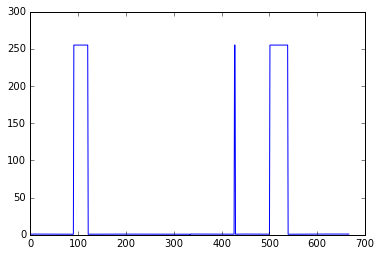

In [34]:
plt.plot(im_text[np.round(0.5*im.shape[0])])

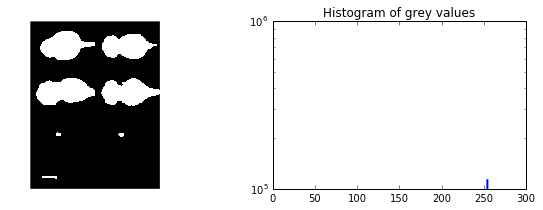

In [24]:
im_box = im_open < 200
im_box = minimum(maximum(im_box, disk(5)),disk(5))
custom_plot(im_box)

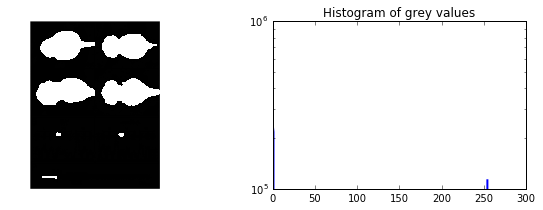

In [33]:
im_text = im
im_text[im_box==255] = 255

custom_plot(im_text)

##For some reason this block is not workin!

In [7]:
from matplotlib import cm
from skimage.feature import canny
from skimage.transform import (hough_line, hough_line_peaks, probabilistic_hough_line)


edges = canny(im_box, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=0, line_length=(0.05*im.shape[0]), line_gap=3)

In [8]:
print('Number of lines = ',len(lines))

Number of lines =  16


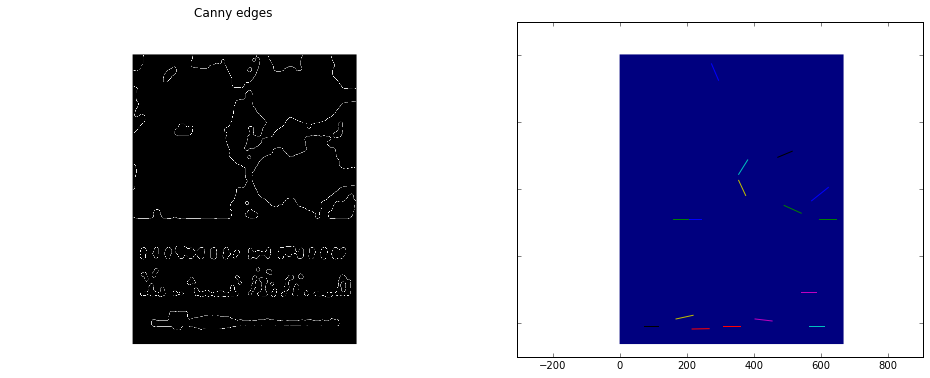

Average lines length =  49.8044169638


In [9]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
ax0.imshow(edges, cmap=cm.gray)
ax0.set_title('Canny edges')
ax0.set_axis_off()
ax0.set_adjustable('box-forced')

d = 0
ax1.imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax1.plot((p0[0], p1[0]), (p0[1], p1[1]))
    d = d + np.sqrt(np.power(p0[0]-p1[0],2)+np.power(p0[1]-p1[1],2))
    
plt.show()

print('Average lines length = ',d/len(lines))

In [10]:
edges = canny(im_text, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=0, line_length=(0.05*im.shape[0]), line_gap=3)

In [11]:
print('Number of lines = ',len(lines))

Number of lines =  15


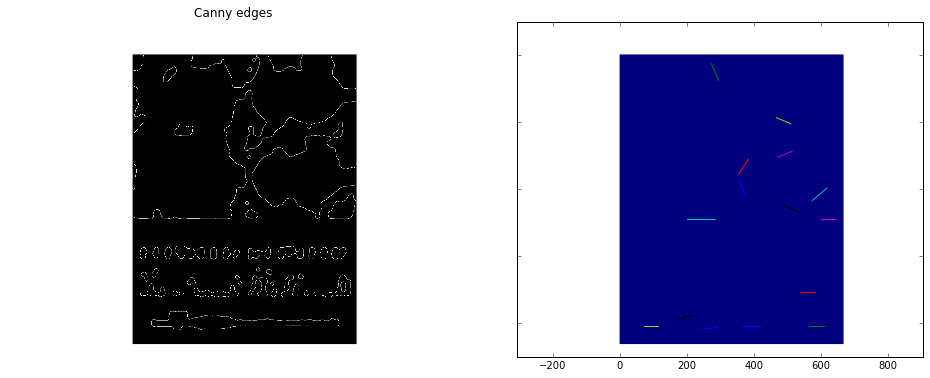

Average lines length =  51.6530290867


In [12]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
ax0.imshow(edges, cmap=cm.gray)
ax0.set_title('Canny edges')
ax0.set_axis_off()
ax0.set_adjustable('box-forced')

d = 0
ax1.imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax1.plot((p0[0], p1[0]), (p0[1], p1[1]))
    d = d + np.sqrt(np.power(p0[0]-p1[0],2)+np.power(p0[1]-p1[1],2))
    
plt.show()

print('Average lines length = ',d/len(lines))

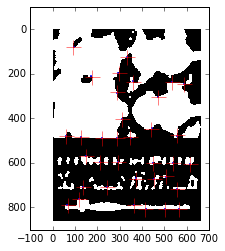

In [13]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks
coords = corner_peaks(corner_harris(im_box), min_distance=50)
coords_subpix = corner_subpix(im_box, coords, window_size=13)
fig, ax = plt.subplots()
ax.imshow(im_box, interpolation='none', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.b', markersize=3)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
plt.show()